
# FLIGHT PRICE PREDICTION
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -


1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

 # STEPS 
 
 
# 1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, 
skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
source, destination, route, departure time, arrival time, duration, total stops and the target variable 
price. You can make changes to it, you can add or you can remove some columns, it completely
depends on the website from which you are fetching the data.
# 2. Data Analysis
After cleaning the data, you have to do some analysis on the data. 
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?
# 3. Model Building
After collecting the data, you need to build a machine learning model. Before model building do 
all data pre-processing steps. Try different models with different hyper parameters and select 
the bestmodel.
Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

In [1]:
#lets Load the dataset and required libraries..

In [2]:
#Import Necessary  Libraries 
import pandas as pd
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt

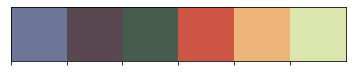

In [3]:
# Color Palettes
colors = ["#6D7696", "#59484F", "#455C4F", "#CC5543", "#EDB579", "#DBE6AF"]
sns.palplot(sns.color_palette(colors))

In [4]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
df=pd.read_excel('flightprice1500rows.xlsx')
df

AIRLINES DATE OF JOURNEY     SOURCE DESTINATION DEPARTURE TIME  \
0      Go First      2022-02-01  NEW DELHI      MUMBAI       13:30:00   
1      Go First      2022-02-01  NEW DELHI      MUMBAI       15:30:00   
2      Go First      2022-02-01  NEW DELHI      MUMBAI       17:00:00   
3      Go First      2022-02-01  NEW DELHI      MUMBAI       07:00:00   
4      Go First      2022-02-01  NEW DELHI      MUMBAI       08:00:00   
...         ...             ...        ...         ...            ...   
1648  Air India      2022-03-01  NEW DELHI    HYDRABAD       05:55:00   
1649  Air India      2022-03-01  NEW DELHI    HYDRABAD       10:55:00   
1650  Air India      2022-03-01  NEW DELHI    HYDRABAD       22:00:00   
1651   SpiceJet      2022-03-01  NEW DELHI    HYDRABAD       11:55:00   
1652   SpiceJet      2022-03-01  NEW DELHI    HYDRABAD       15:05:00   

     ARRIVAL TIME DURATION TOTAL STOPS  PRICE  
0        15:35:00   2h 05m    Non Stop   5954  
1        17:35:00   2h 05m    Non Stop   5954  
2        19:05:00   2h 05m    Non Stop   5954  
3        09:10:00   2h 10m    Non Stop   5954  
4        10:10:00   2h 10m    Non Stop   5954  
...           ...      ...         ...    ...  
1648     17:35:00  11h 40m   3 Stop(s)   5989  
1649     21:05:00  10h 10m   2 Stop(s)   6569  
1650     21:05:00  23h 05m   2 Stop(s)   7425  
1651     18:00:00   6h 05m      1 Stop   8100  
1652     21:00:00   5h 55m      1 Stop   9867  

[1653 rows x 9 columns]

Here we can easily se that price attibute defines the price of the ticket and also the output variable.;and rest of the variables are input variables.

# EDA Process:
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [6]:
#this code cheak the null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AIRLINES         1653 non-null   object        
 1   DATE OF JOURNEY  1653 non-null   datetime64[ns]
 2   SOURCE           1653 non-null   object        
 3   DESTINATION      1653 non-null   object        
 4   DEPARTURE TIME   1653 non-null   object        
 5   ARRIVAL TIME     1653 non-null   object        
 6   DURATION         1653 non-null   object        
 7   TOTAL STOPS      1641 non-null   object        
 8   PRICE            1653 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 116.4+ KB


observations:

1.from above code we can easily find that there is 2 nan values are present in dataset.

In [7]:
#this code answer the datatypes of each column
df.dtypes

AIRLINES                   object
DATE OF JOURNEY    datetime64[ns]
SOURCE                     object
DESTINATION                object
DEPARTURE TIME             object
ARRIVAL TIME               object
DURATION                   object
TOTAL STOPS                object
PRICE                       int64
dtype: object

In [8]:
df.shape

(1653, 9)

In [9]:
df.columns

Index(['AIRLINES', 'DATE OF JOURNEY', 'SOURCE', 'DESTINATION',
       'DEPARTURE TIME', 'ARRIVAL TIME', 'DURATION', 'TOTAL STOPS', 'PRICE'],
      dtype='object')

5955     104
2410      98
5954      80
9840      78
7425      47
        ... 
7037       1
2931       1
13033      1
12644      1
9867       1
Name: PRICE, Length: 239, dtype: int64

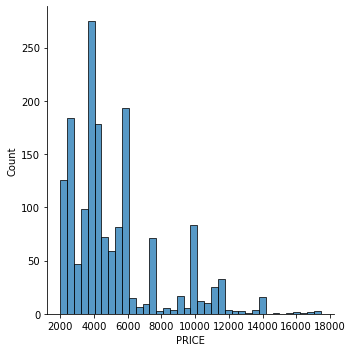

In [10]:
sns.displot(df['PRICE'])
df.PRICE.value_counts()

Observations:

1.As seen from above distribution plot that Price are not equally distributed.

2.Major Price are distributed between 4823 - 10262 rupees.

In [11]:
df.isnull().sum()

AIRLINES            0
DATE OF JOURNEY     0
SOURCE              0
DESTINATION         0
DEPARTURE TIME      0
ARRIVAL TIME        0
DURATION            0
TOTAL STOPS        12
PRICE               0
dtype: int64

In [12]:
df.isnull()

AIRLINES  DATE OF JOURNEY  SOURCE  DESTINATION  DEPARTURE TIME  \
0        False            False   False        False           False   
1        False            False   False        False           False   
2        False            False   False        False           False   
3        False            False   False        False           False   
4        False            False   False        False           False   
...        ...              ...     ...          ...             ...   
1648     False            False   False        False           False   
1649     False            False   False        False           False   
1650     False            False   False        False           False   
1651     False            False   False        False           False   
1652     False            False   False        False           False   

      ARRIVAL TIME  DURATION  TOTAL STOPS  PRICE  
0            False     False        False  False  
1            False     False        False  False  
2            False     False        False  False  
3            False     False        False  False  
4            False     False        False  False  
...            ...       ...          ...    ...  
1648         False     False        False  False  
1649         False     False        False  False  
1650         False     False        False  False  
1651         False     False        False  False  
1652         False     False        False  False  

[1653 rows x 9 columns]

<AxesSubplot:>

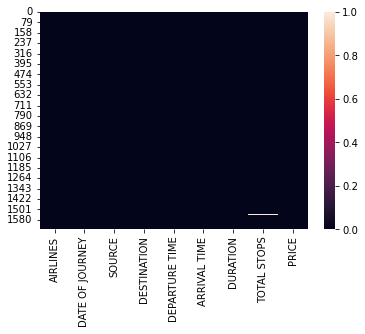

In [13]:
import seaborn as sns
sns.heatmap(df.isnull())

Observations:
    
    1. Nan values are present in the dataset.

# Drop NaN/Null values

In [14]:
#drop the nullvalues
df.dropna(inplace=True)

In [15]:
df.dtypes

AIRLINES                   object
DATE OF JOURNEY    datetime64[ns]
SOURCE                     object
DESTINATION                object
DEPARTURE TIME             object
ARRIVAL TIME               object
DURATION                   object
TOTAL STOPS                object
PRICE                       int64
dtype: object

The datatypes of Date_of_journey, Arrival_Time and Dep_Time are object here. So at fist, need to convert it to to_datetime for proper predicion.

<AxesSubplot:>

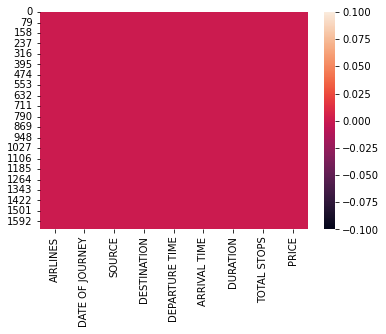

In [16]:
import seaborn as sns
sns.heatmap(df.isnull())

Observations:
    
    Nan values are treaded and no further nan values are present. 

In [17]:
df

AIRLINES DATE OF JOURNEY     SOURCE DESTINATION DEPARTURE TIME  \
0      Go First      2022-02-01  NEW DELHI      MUMBAI       13:30:00   
1      Go First      2022-02-01  NEW DELHI      MUMBAI       15:30:00   
2      Go First      2022-02-01  NEW DELHI      MUMBAI       17:00:00   
3      Go First      2022-02-01  NEW DELHI      MUMBAI       07:00:00   
4      Go First      2022-02-01  NEW DELHI      MUMBAI       08:00:00   
...         ...             ...        ...         ...            ...   
1648  Air India      2022-03-01  NEW DELHI    HYDRABAD       05:55:00   
1649  Air India      2022-03-01  NEW DELHI    HYDRABAD       10:55:00   
1650  Air India      2022-03-01  NEW DELHI    HYDRABAD       22:00:00   
1651   SpiceJet      2022-03-01  NEW DELHI    HYDRABAD       11:55:00   
1652   SpiceJet      2022-03-01  NEW DELHI    HYDRABAD       15:05:00   

     ARRIVAL TIME DURATION TOTAL STOPS  PRICE  
0        15:35:00   2h 05m    Non Stop   5954  
1        17:35:00   2h 05m    Non Stop   5954  
2        19:05:00   2h 05m    Non Stop   5954  
3        09:10:00   2h 10m    Non Stop   5954  
4        10:10:00   2h 10m    Non Stop   5954  
...           ...      ...         ...    ...  
1648     17:35:00  11h 40m   3 Stop(s)   5989  
1649     21:05:00  10h 10m   2 Stop(s)   6569  
1650     21:05:00  23h 05m   2 Stop(s)   7425  
1651     18:00:00   6h 05m      1 Stop   8100  
1652     21:00:00   5h 55m      1 Stop   9867  

[1641 rows x 9 columns]

In [18]:
df.dtypes

AIRLINES                   object
DATE OF JOURNEY    datetime64[ns]
SOURCE                     object
DESTINATION                object
DEPARTURE TIME             object
ARRIVAL TIME               object
DURATION                   object
TOTAL STOPS                object
PRICE                       int64
dtype: object

Observations:
    
    1. Major columns are object datatype hence we label encode them for learning.

# Univariate analysis
Univariate analysis is the simplest form of analyzing data.

#lets start with Distribution ploting.

AIRLINES


Vistara      576
Air India    339
IndiGo       271
Go First     242
SpiceJet     116
Air Asia      97
Name: AIRLINES, dtype: int64


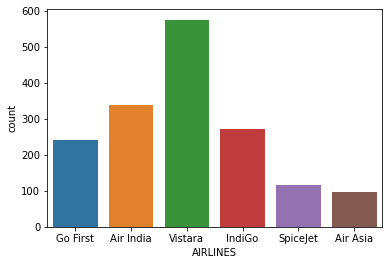

DATE OF JOURNEY


2022-03-01    407
2022-02-22    395
2022-02-15    388
2022-02-08    237
2022-02-01    214
Name: DATE OF JOURNEY, dtype: int64


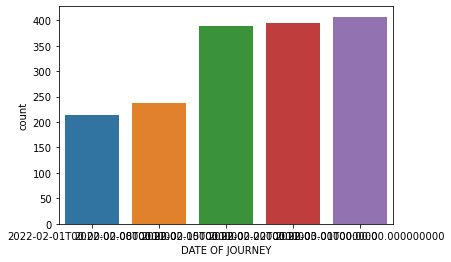

SOURCE


NEW DELHI    1641
Name: SOURCE, dtype: int64


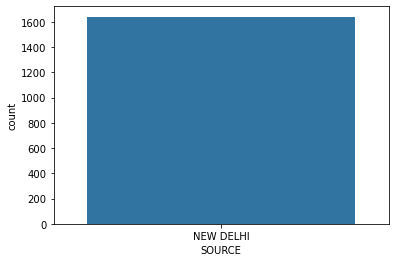

DESTINATION


MUMBAI      694
CHENNAI     520
HYDRABAD    427
Name: DESTINATION, dtype: int64


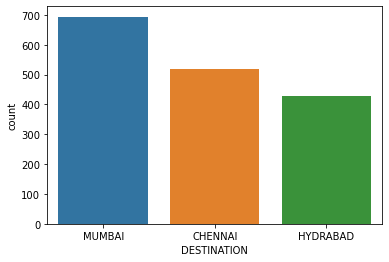

DEPARTURE TIME


07:30:00    50
08:00:00    47
20:40:00    40
19:00:00    39
15:30:00    36
            ..
05:25:00     1
16:00:00     1
15:55:00     1
19:10:00     1
16:55:00     1
Name: DEPARTURE TIME, Length: 134, dtype: int64


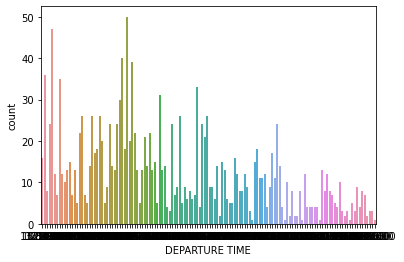

ARRIVAL TIME


20:55:00    68
19:55:00    52
07:50:00    51
21:35:00    48
23:05:00    46
            ..
01:45:00     2
16:00:00     2
20:20:00     1
08:35:00     1
19:10:00     1
Name: ARRIVAL TIME, Length: 161, dtype: int64


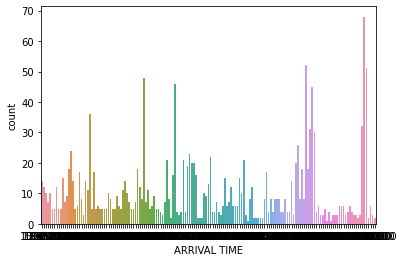

DURATION


2h 10m     118
2h 15m      93
2h 20m      55
2h 50m      37
2h 05m      27
          ... 
11h 45m      1
23h 50m      1
7h 25m       1
11h 15m      1
23h 05m      1
Name: DURATION, Length: 222, dtype: int64


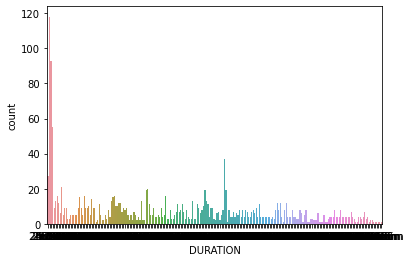

TOTAL STOPS


1 Stop       964
Non Stop     611
2 Stop(s)     60
3 Stop(s)      6
Name: TOTAL STOPS, dtype: int64


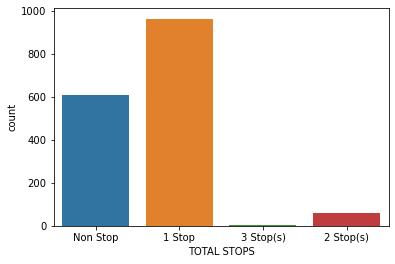

PRICE


5955     104
2410      98
5954      80
9840      78
7425      47
        ... 
7037       1
2931       1
13033      1
12644      1
9867       1
Name: PRICE, Length: 239, dtype: int64


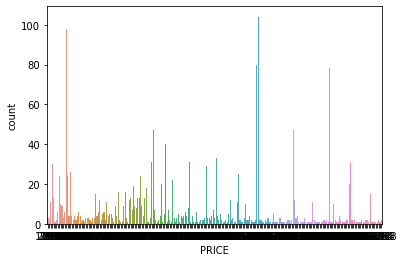

In [19]:
col=['AIRLINES', 'DATE OF JOURNEY', 'SOURCE', 'DESTINATION',
       'DEPARTURE TIME', 'ARRIVAL TIME', 'DURATION', 'TOTAL STOPS', 'PRICE']
for i in col:
    print(i)
    print("\n")
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

# OBSERVATIONS:
    1. This are the plotings of all the features of the dataset.
    2. from this we can easily observe each and every feture selection easily,lets start.
    3. Vistara ,Airindia and indigo are among the most common airlines with most no of operation are there.
    4. Morning and late evening flights having most counts .
    5. Most no of flights having only 2-3 hours of duration time from new delhi to top routs of india.
    6. 1 stop flights are having more counts and 3 stops flights having the least count.
    7. Major price band is 2500 to 1000 almost all the flights in india are having this price band.

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

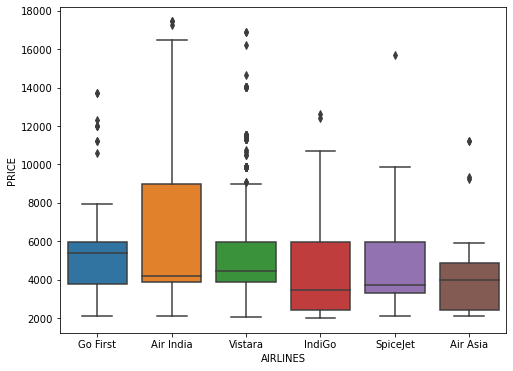

In [20]:
data = pd.concat([df['AIRLINES'], df['PRICE']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['AIRLINES'], y="PRICE", data=data)


# OBSERVATIONS:
    1. Air india having the maximum charges and air asia is least,also it depends on operation time as well.

In [21]:
import plotly.express as px
fig = px.histogram(df, 
                   x='PRICE', 
                   marginal='box', 
                   color='AIRLINES', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Airline vs Price')
fig.update_layout(bargap=0.1)
fig.show()

# OBSERVATIONS:
    1. From above plotting we can easily observe the flights with prices most common price band is between
    3500-4000,as prices increases no of operations of flights are decrease.

In [22]:
fig = px.histogram(df, 
                   x='PRICE', 
                   marginal='box', 
                   color='DESTINATION', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='DESTINATION WITH PRICE')
fig.update_layout(bargap=0.1)
fig.show()

OBSERVATIONS:
    
    1.From above plotting we can observe the prices with destination..

In [23]:
fig = px.scatter(df, 
                 y='DURATION', 
                 x='TOTAL STOPS', 
                 color='DESTINATION', 
                 opacity=0.8, 
                 hover_data=['PRICE'], 
                 title='TOTAL STOPS vs. DURATION')
fig.update_traces(marker_size=5)
fig.show()

# OBSERVATIONS:
    1. Chennai having highest nos of non stop and 1 stop  flights, mumbai having flights having 1 stop as most common.

In [24]:
fig = px.scatter(df, 
                 x='DEPARTURE TIME', 
                 y='ARRIVAL TIME', 
                 color='AIRLINES', 
                 opacity=0.8, 
                 hover_data=['PRICE'], 
                 title='DEPARTURE TIME,ARRIVAL TIME WITH PRICE')
fig.update_traces(marker_size=5)
fig.show()

# OBSERVATIONS:
    1. From this we observe that arrival time and departure time is not providing mush insights regarding price band.

In [25]:
fig = px.scatter(df, 
                 x='DATE OF JOURNEY', 
                 y='PRICE', 
                 color='PRICE', 
                 opacity=0.8, 
                 hover_data=['AIRLINES'], 
                 title='DATE OF JOURNEY vs. PRICE')
fig.update_traces(marker_size=5)
fig.show()

# OBSERVATIONS:
    1. We easily find that prices are less as we do advanced booking of atleast 3 weeks. prices are very high for same day as well as within 2 weeks of journey.

In [26]:
fig = px.scatter(df, 
                 x='DEPARTURE TIME', 
                 y='PRICE', 
                 color='DESTINATION', 
                 opacity=0.8, 
                 hover_data=['AIRLINES'], 
                 title='DEPARTURE TIME vs. PRICE')
fig.update_traces(marker_size=5)
fig.show()

# Observations:
    1. morining flights are very expencive with comparison to afternoon flights.

In [27]:
fig = px.scatter(df, 
                 y='DURATION', 
                 x='PRICE', 
                 color='AIRLINES', 
                 opacity=0.8, 
                 hover_data=['TOTAL STOPS'], 
                 title='DURATION vs. PRICE')
fig.update_traces(marker_size=5)
fig.show()

# OBSERVATIONS:
    1. Duration increases the price of the flights tickets.

# Destination vs Price with box plot

<AxesSubplot:xlabel='DESTINATION', ylabel='PRICE'>

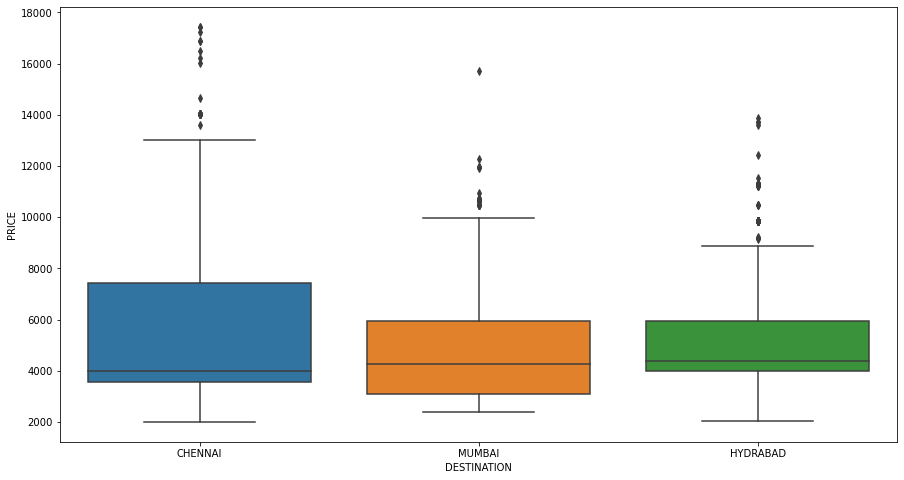

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.boxplot(x='DESTINATION',y='PRICE',data=df.sort_values('PRICE',ascending=False))

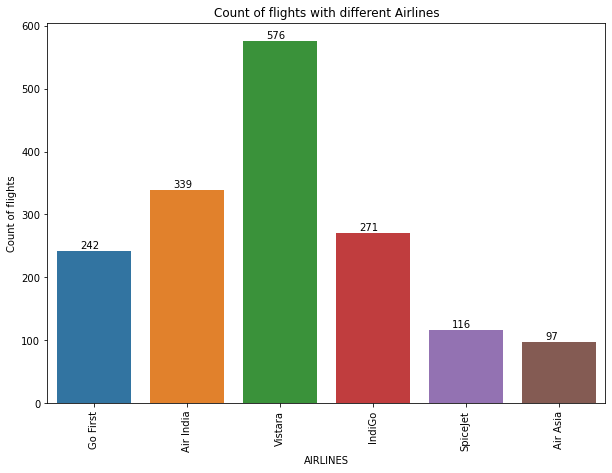

In [29]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'AIRLINES', data =df)
plt.xlabel('AIRLINES')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Observations:
    
    clearly find that maximum no of flights are from VISTARA. 

# 2. Data Analysis
After cleaning the data, you have to do some analysis on the data. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

# Observations of data analysis and answers of some common questions.

1. Airfares changes freuently mostly high on 3weeks of depature date.
2. large jumps are present in fares last minutes tickets are high upto 17000 as comparison to book a ticket 5 weeks before the departure date.
3. yes they go up and down on holidays or in special occations or events in country.
4. for maximum saving on air ticket consumer can book a non stop flight 5 weeks earlier for maximum bebifit from the airlines.
5. yes prices are high near departure dates.
6. spice jet is cheaper from all the flights present in dataset.
7. As compare to any other time morning flights are very expencive and afternoon flights are cheaper from all.

In [30]:
df.head()

AIRLINES DATE OF JOURNEY     SOURCE DESTINATION DEPARTURE TIME  \
0  Go First      2022-02-01  NEW DELHI      MUMBAI       13:30:00   
1  Go First      2022-02-01  NEW DELHI      MUMBAI       15:30:00   
2  Go First      2022-02-01  NEW DELHI      MUMBAI       17:00:00   
3  Go First      2022-02-01  NEW DELHI      MUMBAI       07:00:00   
4  Go First      2022-02-01  NEW DELHI      MUMBAI       08:00:00   

  ARRIVAL TIME DURATION TOTAL STOPS  PRICE  
0     15:35:00   2h 05m    Non Stop   5954  
1     17:35:00   2h 05m    Non Stop   5954  
2     19:05:00   2h 05m    Non Stop   5954  
3     09:10:00   2h 10m    Non Stop   5954  
4     10:10:00   2h 10m    Non Stop   5954

# Label Encode the following Features:
we use labele Encoder for changing types of object data type to int datatype

In [31]:
x=df.drop('PRICE', axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [33]:
df1=x.apply(LabelEncoder().fit_transform)

In [34]:
PRICE=df["PRICE"]

In [35]:
df1['PRICE']=PRICE

In [36]:
df1

AIRLINES  DATE OF JOURNEY  SOURCE  DESTINATION  DEPARTURE TIME  \
0            2                0       0            2              66   
1            2                0       0            2              78   
2            2                0       0            2              90   
3            2                0       0            2              17   
4            2                0       0            2              25   
...        ...              ...     ...          ...             ...   
1648         1                4       0            1               8   
1649         1                4       0            1              49   
1650         1                4       0            1             129   
1651         4                4       0            1              55   
1652         4                4       0            1              77   

      ARRIVAL TIME  DURATION  TOTAL STOPS  PRICE  
0               81       142            3   5954  
1              100       142            3   5954  
2              113       142            3   5954  
3               34       143            3   5954  
4               43       143            3   5954  
...            ...       ...          ...    ...  
1648           100        19            2   5989  
1649           131         1            1   6569  
1650           131       102            1   7425  
1651           105       178            0   8100  
1652           130       176            0   9867  

[1641 rows x 9 columns]

# CORRELATION BETWEEN THE COLUMNS:

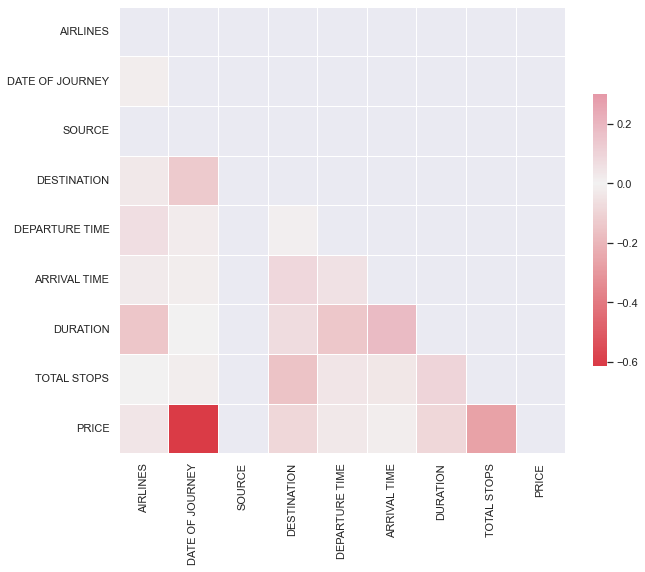

In [37]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df1.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

OBSERVATION :
    SOURCE GIVES 0 RELATION LETS DROP IT FIRST

<AxesSubplot:>

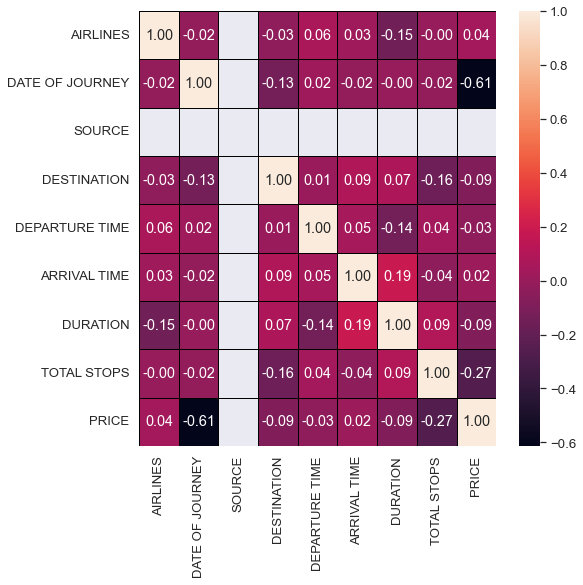

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Observations:

1.Feature columns are not much collinear.

# Discription of dataset

In [39]:
df1.describe()

AIRLINES  DATE OF JOURNEY  SOURCE  DESTINATION  DEPARTURE TIME  \
count  1641.000000      1641.000000  1641.0  1641.000000     1641.000000   
mean      3.034735         2.331505     0.0     1.106033       66.127361   
std       1.726589         1.337923     0.0     0.853811       38.063589   
min       0.000000         0.000000     0.0     0.000000        0.000000   
25%       1.000000         1.000000     0.0     0.000000       33.000000   
50%       3.000000         2.000000     0.0     1.000000       65.000000   
75%       5.000000         3.000000     0.0     2.000000       99.000000   
max       5.000000         4.000000     0.0     2.000000      133.000000   

       ARRIVAL TIME     DURATION  TOTAL STOPS         PRICE  
count   1641.000000  1641.000000  1641.000000   1641.000000  
mean      85.907983   124.401584     1.160878   5205.778793  
std       47.945123    62.249294     1.433810   2779.013728  
min        0.000000     0.000000     0.000000   1999.000000  
25%       41.000000    69.000000     0.000000   3519.000000  
50%       92.000000   143.000000     0.000000   4209.000000  
75%      129.000000   172.000000     3.000000   5955.000000  
max      160.000000   221.000000     3.000000  17443.000000

# PLOTTING THE DISCRIPTION OF DATASET

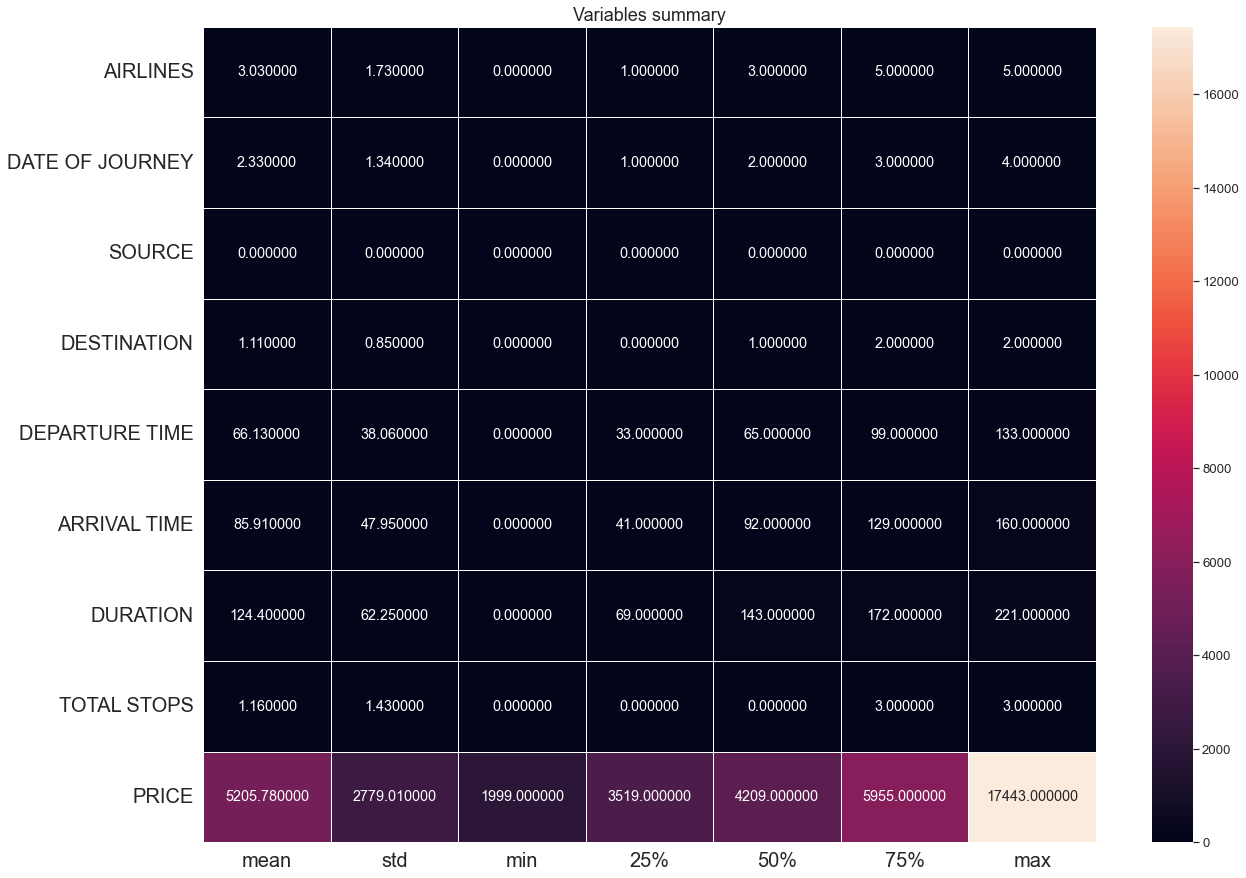

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.set(font_scale=1.5)
plt.title("Variables summary")
plt.show()


Observations:
    
    1.From above plotting we can find mean,std,min,25%,50%,75% and max data of the following dataset.
    

In [41]:
df=df1

# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
x=df.drop('PRICE', axis=1)

In [44]:
y=df["PRICE"]

In [45]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [46]:
vif_calc()

   VIF Factor         features
0    3.375659         AIRLINES
1    3.333227  DATE OF JOURNEY
2         NaN           SOURCE
3    2.547488      DESTINATION
4    3.537085   DEPARTURE TIME
5    4.146968     ARRIVAL TIME
6    4.379629         DURATION
7    1.671168      TOTAL STOPS


observation:
    airlines and date of journey are colinear .

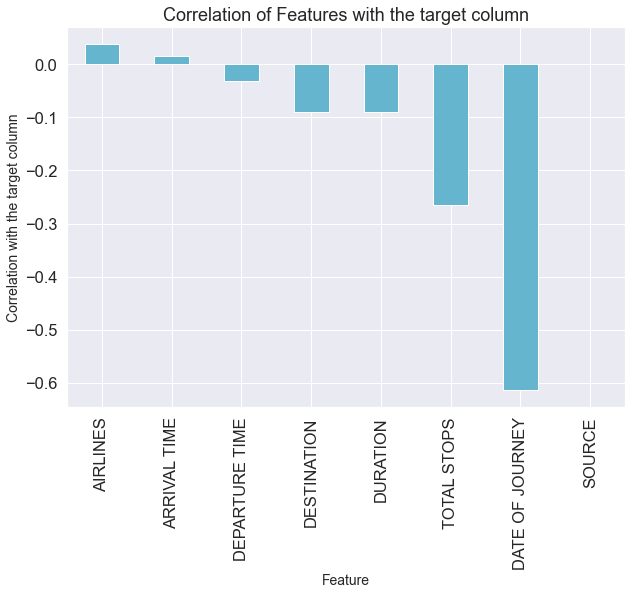

In [47]:
plt.figure(figsize=(10,7))
df.corr()['PRICE'].sort_values(ascending=False).drop(['PRICE']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


array([[<AxesSubplot:title={'center':'AIRLINES'}>,
        <AxesSubplot:title={'center':'DATE OF JOURNEY'}>,
        <AxesSubplot:title={'center':'SOURCE'}>],
       [<AxesSubplot:title={'center':'DESTINATION'}>,
        <AxesSubplot:title={'center':'DEPARTURE TIME'}>,
        <AxesSubplot:title={'center':'ARRIVAL TIME'}>],
       [<AxesSubplot:title={'center':'DURATION'}>,
        <AxesSubplot:title={'center':'TOTAL STOPS'}>,
        <AxesSubplot:title={'center':'PRICE'}>]], dtype=object)

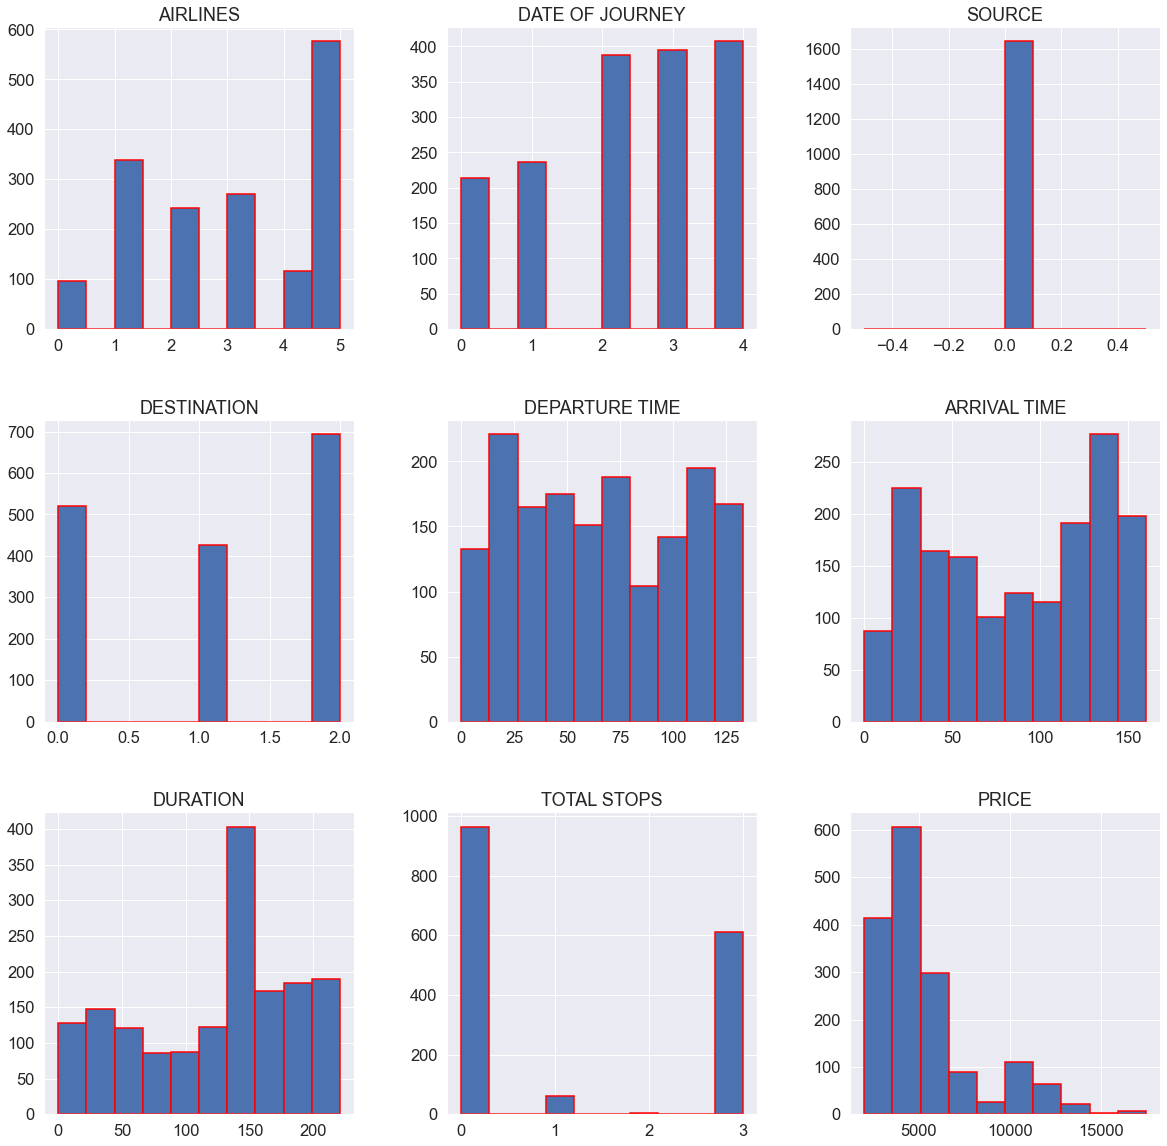

In [48]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

# Cheak the skewness:

Now use subplot and displot to check data are normalised or not.

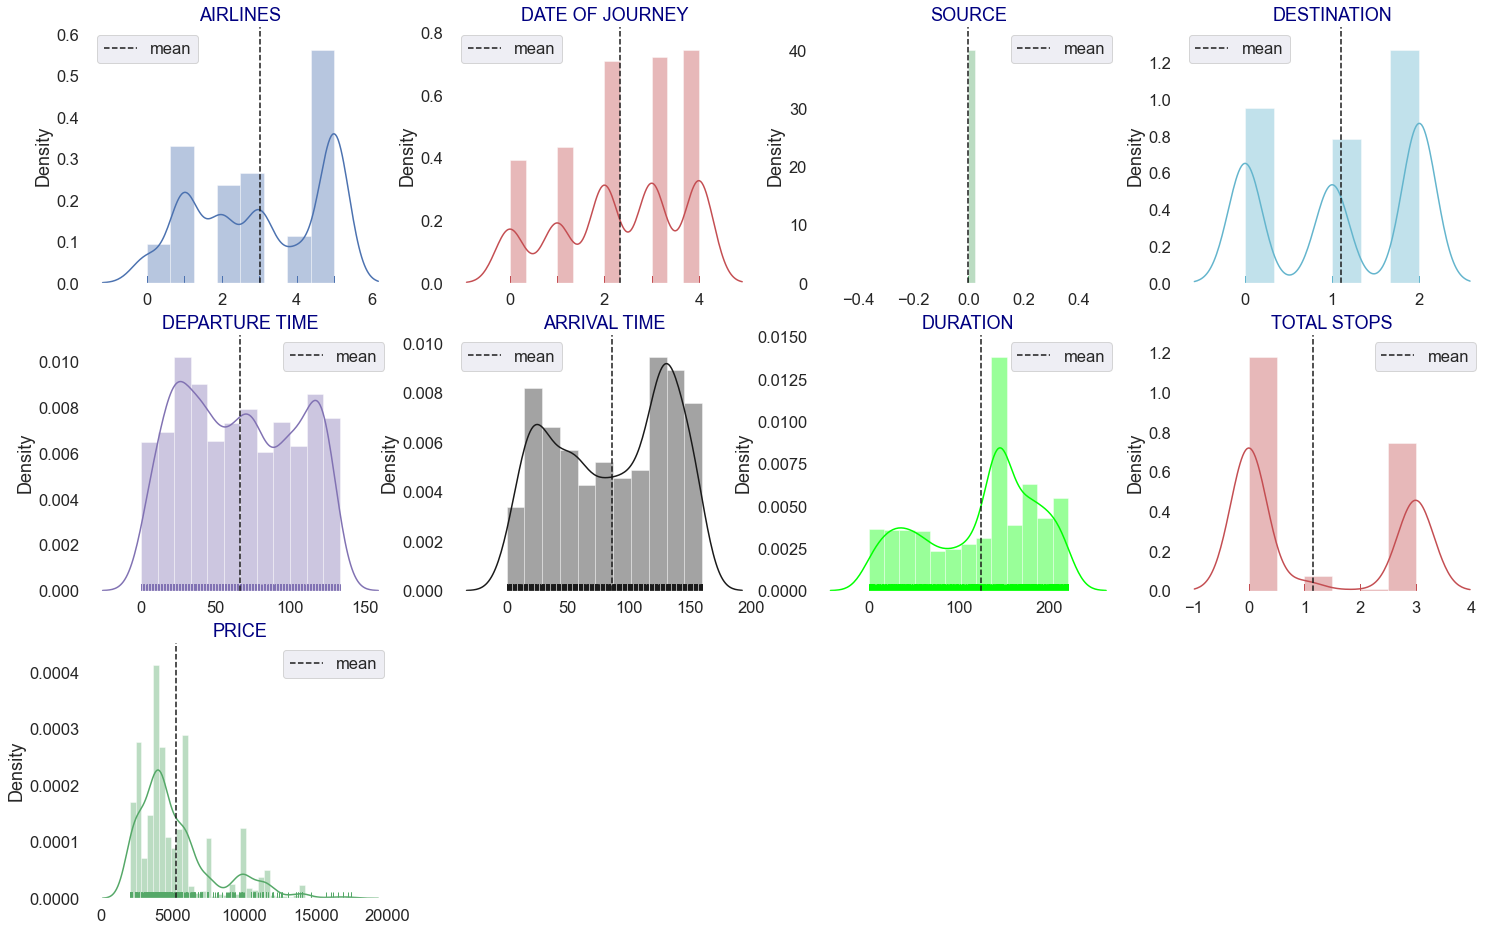

In [49]:
import itertools
import matplotlib.pyplot as plt
cols = ['AIRLINES', 'DATE OF JOURNEY', 'SOURCE', 'DESTINATION',
       'DEPARTURE TIME', 'ARRIVAL TIME', 'DURATION', 'TOTAL STOPS', 'PRICE']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","r","g"]
fig = plt.figure(figsize=(25,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(9,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

1. From above plotting of distribution plot we see that some features columns are not normally distributed.

2. some columns are skewed towards right.

3. Building blocks are out of the normal curve hence outliers are present.

In [50]:
df.skew()

AIRLINES          -0.161134
DATE OF JOURNEY   -0.325612
SOURCE             0.000000
DESTINATION       -0.204270
DEPARTURE TIME     0.078507
ARRIVAL TIME      -0.160705
DURATION          -0.443191
TOTAL STOPS        0.475527
PRICE              1.467616
dtype: float64

# Detecting outliers:

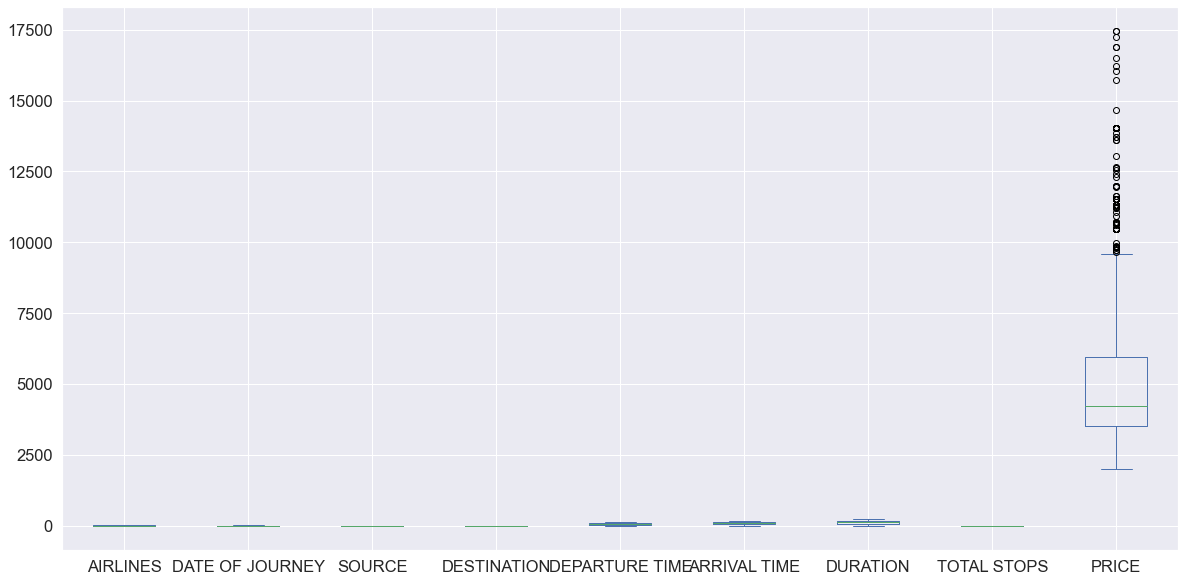

In [51]:
df.plot.box(figsize=(20,10))
sns.set(font_scale=1)

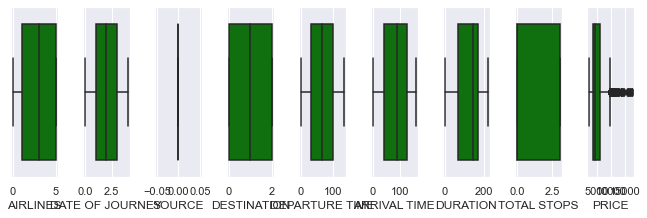

In [52]:
collist=df.columns.values
ncol=30
nrows=30
sns.set(font_scale=1)
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


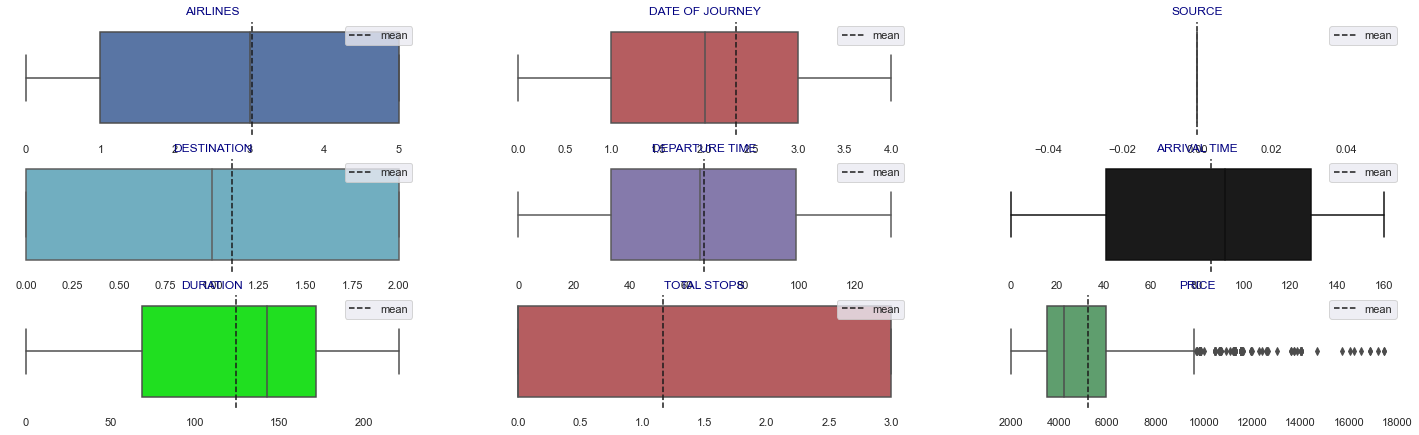

In [53]:
import itertools
import matplotlib.pyplot as plt
cols = ['AIRLINES', 'DATE OF JOURNEY', 'SOURCE', 'DESTINATION',
       'DEPARTURE TIME', 'ARRIVAL TIME', 'DURATION', 'TOTAL STOPS', 'PRICE']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","r","g"]
fig = plt.figure(figsize=(25,70))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(28,3,j+1)
    ax = sns.boxplot(df[i],color=k)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# OUTLIERS ARE PRESENT IN DATA SET BUT IN SMALL QUANTITIES,AND THERE THERHOLD VALUE IS VERY LESS, ALSO MAXIMUM OUTLIERS ARE PRESENT IN PRICE COLUMN WHICH IS OUR  TARGET VARIABLE .

# Split the dataset in input columns and target columns..

In [54]:
x=df.drop("PRICE",axis=1)

In [55]:
y=df['PRICE']

In [56]:
x.shape

(1641, 8)

In [57]:
y.shape

(1641,)

# Removing skewness by transforming data.

In [58]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.57432947, -1.6939266 ,  0.        , ..., -0.02513464,
         0.28350457,  1.24918443],
       [-0.57432947, -1.6939266 ,  0.        , ...,  0.34875362,
         0.28350457,  1.24918443],
       [-0.57432947, -1.6939266 ,  0.        , ...,  0.59539382,
         0.28350457,  1.24918443],
       ...,
       [-1.18016884,  1.27499373,  0.        , ...,  0.92674127,
        -0.35878336,  0.52396802],
       [ 0.57258904,  1.27499373,  0.        , ...,  0.4444134 ,
         0.86105099, -0.83060225],
       [ 0.57258904,  1.27499373,  0.        , ...,  0.90861184,
         0.82897582, -0.83060225]])

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.57432947, -1.6939266 ,  0.        , ..., -0.02513464,
         0.28350457,  1.24918443],
       [-0.57432947, -1.6939266 ,  0.        , ...,  0.34875362,
         0.28350457,  1.24918443],
       [-0.57432947, -1.6939266 ,  0.        , ...,  0.59539382,
         0.28350457,  1.24918443],
       ...,
       [-1.18016884,  1.27499373,  0.        , ...,  0.92674127,
        -0.35878336,  0.52396802],
       [ 0.57258904,  1.27499373,  0.        , ...,  0.4444134 ,
         0.86105099, -0.83060225],
       [ 0.57258904,  1.27499373,  0.        , ...,  0.90861184,
         0.82897582, -0.83060225]])

# Since the column has binary variable we will use linear Regression

# Regression Model Building:
#Linear Regression:

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [61]:
max_scr=0
for i in range(0,100):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    
    print("At random state",i," The model performs very well")
    print("At random_state:-",i)
    print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
    print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 0  The model performs very well
At random_state:- 0
Training r2_score is:- 49.688739932470114
Testing r2_score is:- 43.74567254904578
At random state 1  The model performs very well
At random_state:- 1
Training r2_score is:- 48.89538604431826
Testing r2_score is:- 46.81606557488851
At random state 2  The model performs very well
At random_state:- 2
Training r2_score is:- 47.31708978003648
Testing r2_score is:- 52.97590763507267
At random state 3  The model performs very well
At random_state:- 3
Training r2_score is:- 47.89734698018193
Testing r2_score is:- 51.724375877415696
At random state 4  The model performs very well
At random_state:- 4
Training r2_score is:- 47.842174880294486
Testing r2_score is:- 52.25116725995724
At random state 5  The model performs very well
At random_state:- 5
Training r2_score is:- 46.77212217194211
Testing r2_score is:- 55.80749768917652
At random state 6  The model performs very well
At random_state:- 6
Training r2_score is:- 47.661819513

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=24)

In [63]:


lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)


0.5482599489986677

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [66]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Error:
Mean Absolute Error: 1337.5404154177709
Mean Squared Error: 3158736.1867241864
Root Mean Square Error: 1777.2833726573224


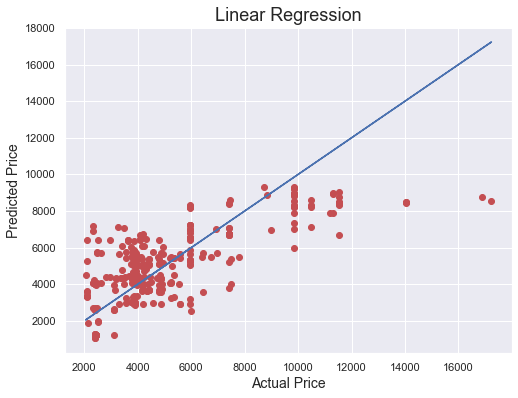

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

# 1. Lasso

In [68]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [69]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 9.151051998557701
R2_score is :- 54.88405035849671


At cv:- 3
Cross validation score is:- 43.85367308406806
R2_score is :- 54.88405035849671


At cv:- 4
Cross validation score is:- 19.054211612717495
R2_score is :- 54.88405035849671


At cv:- 5
Cross validation score is:- 16.317881983717136
R2_score is :- 54.88405035849671


At cv:- 6
Cross validation score is:- -6.874708639508851
R2_score is :- 54.88405035849671


At cv:- 7
Cross validation score is:- -39.93628740982682
R2_score is :- 54.88405035849671


At cv:- 8
Cross validation score is:- -11.467164370703047
R2_score is :- 54.88405035849671


At cv:- 9
Cross validation score is:- 19.821101120460916
R2_score is :- 54.88405035849671




At cv:- 3
Cross validation score is:- 43.85367308406806
R2_score is :- 54.88405035849671

In [70]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 1335.1659467645227
Mean Squared Error: 3154676.730902088
Root Mean Square Error: 1776.140965943325


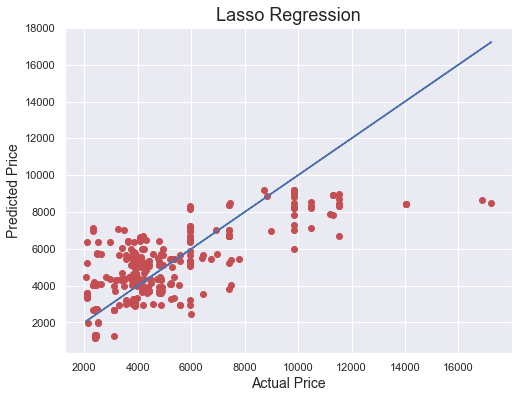

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [72]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [73]:
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,10):
    rds = r2_score(ytest,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 54.8254166625884
Cross Val Score: 9.060457858082838
At cv:- 3
R2 Score: 54.8254166625884
Cross Val Score: 44.140552405583904
At cv:- 4
R2 Score: 54.8254166625884
Cross Val Score: 18.79165284220615
At cv:- 5
R2 Score: 54.8254166625884
Cross Val Score: 16.536500541748342
At cv:- 6
R2 Score: 54.8254166625884
Cross Val Score: -6.885084596375359
At cv:- 7
R2 Score: 54.8254166625884
Cross Val Score: -39.38075126612247
At cv:- 8
R2 Score: 54.8254166625884
Cross Val Score: -11.188790803412159
At cv:- 9
R2 Score: 54.8254166625884
Cross Val Score: 20.039340005590496


At cv:- 3
R2 Score: 54.8254166625884
Cross Val Score: 44.140552405583904

In [74]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 1335.2047916296142
Mean Squared Error: 3158776.6192475297
Root Mean Square Error: 1777.2947474314803


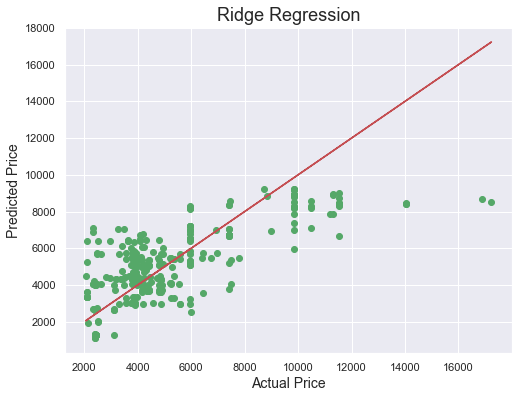

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='g')
plt.plot(ytest,ytest, color='r')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# Decision Tree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}


In [77]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse', splitter='best',max_features= 'auto')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 81.75316767676757
Cross Val Score: 39.23242175068831
At cv:- 3
R2 Score: 81.75316767676757
Cross Val Score: 53.318413125352905
At cv:- 4
R2 Score: 81.75316767676757
Cross Val Score: -2.434626731048231
At cv:- 5
R2 Score: 81.75316767676757
Cross Val Score: 1.1814808506455043
At cv:- 6
R2 Score: 81.75316767676757
Cross Val Score: -16.44407630192744
At cv:- 7
R2 Score: 81.75316767676757
Cross Val Score: -7.525773052969975
At cv:- 8
R2 Score: 81.75316767676757
Cross Val Score: -49.89787976747201
At cv:- 9
R2 Score: 81.75316767676757
Cross Val Score: 18.150884953356517


At cv:- 2
R2 Score: 81.42018750391063
Cross Val Score: 38.68399950876628

In [78]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 399.35562310030394
Mean Squared Error: 1275887.0820668694
Root Mean Square Error: 1129.5517173050862


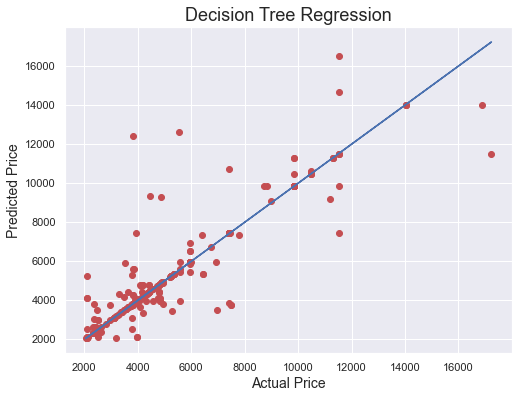

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# RandomForestRegressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'log2', 'n_estimators': 300}


In [107]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='friedman_mse',n_estimators=300,max_features='log2')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)


for j in range(2,5):
    print("At cv:-",j)

    rfs= r2_score(ytest,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc= rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 90.5410759345019
Cross Val Score: 58.831804139852984
At cv:- 3
R2 Score: 90.5410759345019
Cross Val Score: 67.10984011546975
At cv:- 4
R2 Score: 90.5410759345019
Cross Val Score: 54.15944872820692


At cv:- 3
R2 Score: 91.09328380250939
Cross Val Score: 67.835360999547

In [82]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_random))
print('Mean Squared Error:',mean_squared_error(ytest,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_random)))


Error:
Mean Absolute Error: 459.09111752786225
Mean Squared Error: 649986.3198834781
Root Mean Square Error: 806.2172907371053


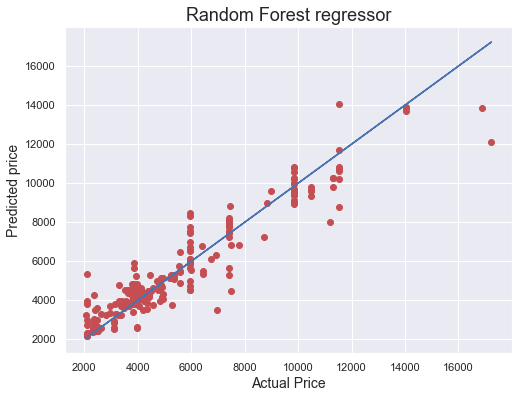

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted price',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [84]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [85]:
gbr= GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 87.08833059047424
Cross Val Score: 61.285082122391124
At cv:- 3
R2 Score: 87.08833059047424
Cross Val Score: 58.21858608513607
At cv:- 4
R2 Score: 87.08833059047424
Cross Val Score: 45.72568321785509
At cv:- 5
R2 Score: 87.08833059047424
Cross Val Score: 50.699826731895826
At cv:- 6
R2 Score: 87.08833059047424
Cross Val Score: 27.385281604499067
At cv:- 7
R2 Score: 87.08833059047424
Cross Val Score: 45.035434992560965
At cv:- 8
R2 Score: 87.08833059047424
Cross Val Score: 46.53481102934789
At cv:- 9
R2 Score: 87.08833059047424
Cross Val Score: 49.159648863683216


In [86]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 623.2811203108624
Mean Squared Error: 902832.4432266997
Root Mean Square Error: 950.1749540093655


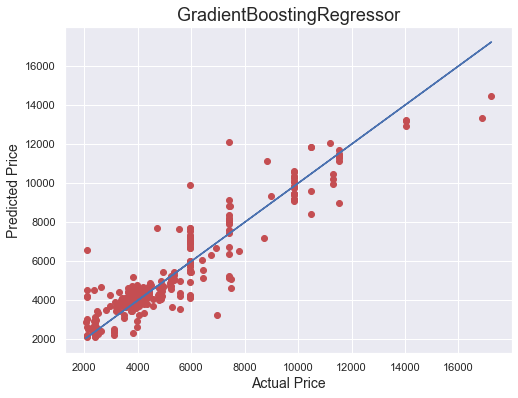

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gradient, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# Support vector Regression

In [88]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'linear'}


In [89]:
sv = SVR(kernel = 'linear', gamma = 'auto',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,5):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 19.788834886242014
Cross Val Score: -0.4834779903480413
At cv:- 3
R2 Score: 19.788834886242014
Cross Val Score: 13.329238123658815
At cv:- 4
R2 Score: 19.788834886242014
Cross Val Score: 2.2466169775900213


In [90]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_vector))
print('Mean Squared Error:',mean_squared_error(ytest,pred_vector))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_vector)))


Error:
Mean Absolute Error: 1549.9105483732474
Mean Squared Error: 5608666.073829898
Root Mean Square Error: 2368.2622476891993


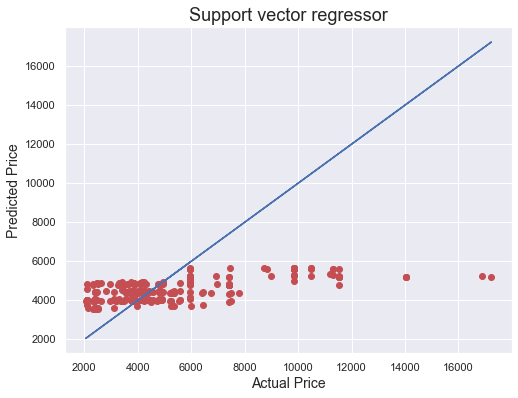

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [92]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}


In [93]:
kn = KNeighborsRegressor(algorithm = 'brute', weights = 'distance',n_neighbors=5)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,5):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 78.75334974807822
Cross Val Score: -0.47634940104003487
At cv:- 3
R2 Score: 78.75334974807822
Cross Val Score: 0.9793905277223184
At cv:- 4
R2 Score: 78.75334974807822
Cross Val Score: -0.2466377521303721


In [94]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_k))
print('Mean Squared Error:',mean_squared_error(ytest,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_k)))


Error:
Mean Absolute Error: 744.4273692476884
Mean Squared Error: 1485645.6240409808
Root Mean Square Error: 1218.8706346618499


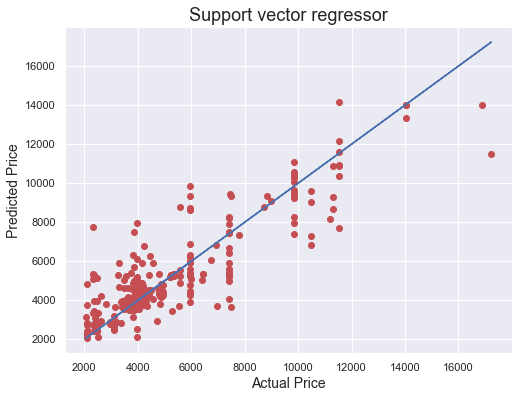

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# List of accuracy score of different linear models

In [96]:
print("logistic Regression:-",r2_score(ytest,pred_test))
print("lasso regression:-",r2_score(ytest,pred_ls))
print("ridge regression:-",r2_score(ytest,pred_rd))
print("Dicision Tree regression:-",r2_score(ytest,pred_decision))
print("Random Forest regression:-",r2_score(ytest,pred_random))
print("gradient bossting:-",r2_score(ytest,pred_gradient))
print("support vector:-",r2_score(ytest,pred_vector))
print("K-neerest Neighbors :-",r2_score(ytest,pred_k))

logistic Regression:- 0.5482599489986677
lasso regression:- 0.548840503584967
ridge regression:- 0.548254166625884
Dicision Tree regression:- 0.8175316767676757
Random Forest regression:- 0.9070435655473847
gradient bossting:- 0.8708833059047425
support vector:- 0.19788834886242013
K-neerest Neighbors :- 0.7875334974807822


# We tested 8 models out of which Random forest  Regression performing Best as Accuracy score and CV is Optimum.

# Conclusion

In [97]:
import numpy as np
a=np.array(ytest)
a

array([ 3871,  7425,  4093,  5989,  3876,  5341,  4327,  4209,  5955,
        2410,  3988,  4832,  2049,  9840,  3569,  3977,  2456,  7425,
        7425,  4716,  3832,  2410,  4351,  5955,  4865,  3569,  3826,
        3786,  4233,  4209,  3977,  5955,  5955,  3100,  3100,  7425,
        3884,  4429, 14028,  5353,  3918,  3480,  4140,  3833,  4783,
        4588,  3988,  2518,  4209,  5955,  4939,  5252,  5955,  2410,
       11520,  5294,  4093,  5954,  2099,  3977,  5955,  3884,  5955,
        2800,  7478,  2456,  5252,  5252,  2410,  3988,  3884,  3990,
        8732,  9000,  2344, 10470,  2410,  3831,  2456,  5955,  4378,
        5587,  4783,  2476,  4429,  2343,  7426, 11310,  3977,  5954,
        2456,  2102, 11520,  4865,  2098,  3977,  6459, 11520,  5252,
        5955,  5955,  4832,  5954,  4838,  7425,  3918,  5252,  7425,
        3131,  2343,  4474,  2410,  9840,  4351,  3832,  7772,  2099,
        2637,  7425,  2476,  3876,  2410,  4140,  4327,  4378, 14028,
        5955,  2344,

In [98]:
predicted=np.array(pred_random)
predicted

array([ 4221.02      ,  7848.315     ,  4161.16      ,  5474.22      ,
        5516.115     ,  5237.435     ,  4422.08      ,  4220.8       ,
        6014.185     ,  2417.255     ,  4072.5775    ,  4033.145     ,
        3385.8       ,  9673.945     ,  3709.855     ,  4233.35      ,
        2578.255     ,  8069.92      ,  8273.        ,  4798.13      ,
        3714.13      ,  2454.785     ,  3819.885     ,  5916.945     ,
        4844.095     ,  3827.565     ,  3975.27      ,  4803.84      ,
        4184.75      ,  4277.115     ,  3818.165     ,  6040.42      ,
        5915.205     ,  2634.015     ,  2591.545     ,  8275.12      ,
        4389.67      ,  4471.44      , 13786.205     ,  5290.665     ,
        5160.795     ,  3626.54      ,  4190.3       ,  3889.35      ,
        4753.505     ,  4717.15      ,  4054.185     ,  2466.275     ,
        4378.315     ,  6113.555     ,  4150.885     ,  5180.235     ,
        7836.54      ,  2410.025     ,  8703.45      ,  3788.29      ,
      

In [99]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [100]:
df_com

original  predicted
0        3871   4221.020
1        7425   7848.315
2        4093   4161.160
3        5989   5474.220
4        3876   5516.115
..        ...        ...
324      4748   4498.465
325      3832   3968.930
326      2621   3343.490
327      4940   4370.235
328      5954   4704.690

[329 rows x 2 columns]

In [101]:
df_com.sample(10)

original  predicted
42       4140   4190.300
157      2410   2412.755
293      5958   6014.560
191      2098   2266.600
231      4093   4260.315
278      4140   4321.640
165      2463   3760.180
134     10470   9718.045
109      2343   2482.675
46       3988   4054.185

# The best model is Random forest Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# At cv:- 3 
# R2 Score: 91.03642190833001
# Cross Val Score: 67.81870798851165

Our Model performs with Accuracy 91%...
Saving the best models with initials...using pickle library

In [102]:
import pickle
filename = 'Flight_Price_Prediction.pkl'
pickle.dump(gbr, open(filename, 'wb'))

Conclusion: As our model Accuracy is over 91% which is good in terms of initial model building.Random forest regressor is best from the rest.